### Business Problem –

NewGen laptop, a new competitor, aims to target the market by offering high-end features at competitive prices for students and creative/working professionals. However, they lack a clear understanding of which features are most valuable to these user groups and how to balance features and cost.

This project will leverage a dataset containing laptop features to identify user-valued features and optimize the feature-value balance for competitive pricing. This will help the company develop a compelling product line that attracts its target audiences.

This project will leverage a dataset containing laptop features to achieve two key goals:

1. Identify the insights from the dataset for user-valued features and understand their impact on user experience for students and creative/working professionals.

2. Develop a price prediction model to estimate the cost of laptops with different feature combinations, ensuring competitive pricing.


### Steps to follow down the lane - 

1. Data Cleaning 
2. EDA
3. Feature Engineering
4. Modelling
5. Price prediction


In [1]:
pip install forex-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates

In [3]:
df=pd.read_csv('C:/Users/msura/OneDrive/Desktop/Conestoga/Predictive Analytics/Python/Project/laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
c= CurrencyRates()
exchange_rates = c.get_rate('INR','CAD')

In [5]:
df['price_in_cad']=df['Price']*exchange_rates

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
 12  price_in_cad      1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [7]:
df.shape

(1303, 13)

In [8]:
df.drop(columns=['Price'],inplace=True)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1159.385021
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,777.954281
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,497.612423
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2195.941988
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1560.858724
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,552.133436
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1297.253952
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,198.179556
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,661.175463


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [10]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
price_in_cad        0
dtype: int64

In [11]:
df.drop(columns='Unnamed: 0',inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1159.385021
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,777.954281
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,497.612423
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2195.941988
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1560.858724
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,552.133436
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1297.253952
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,198.179556
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,661.175463


In [12]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,552.133436
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1297.253952
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,198.179556
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  price_in_cad      1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [14]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  price_in_cad      1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


C:\Users\msura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_in_cad', ylabel='Density'>

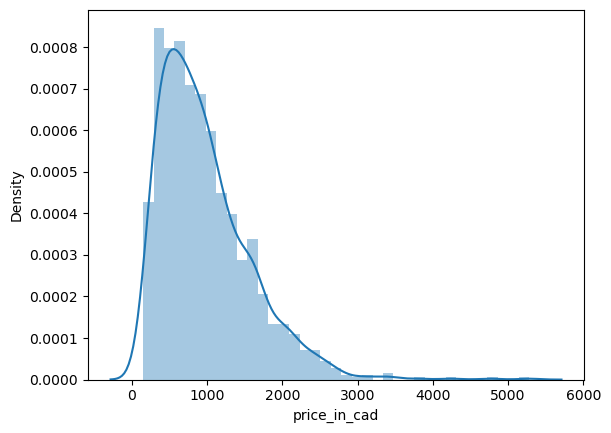

In [15]:
sns.distplot(df['price_in_cad'])

<AxesSubplot:>

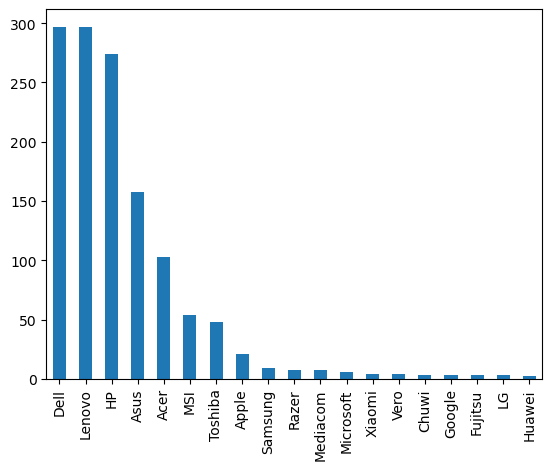

In [16]:
df['Company'].value_counts().plot(kind='bar')

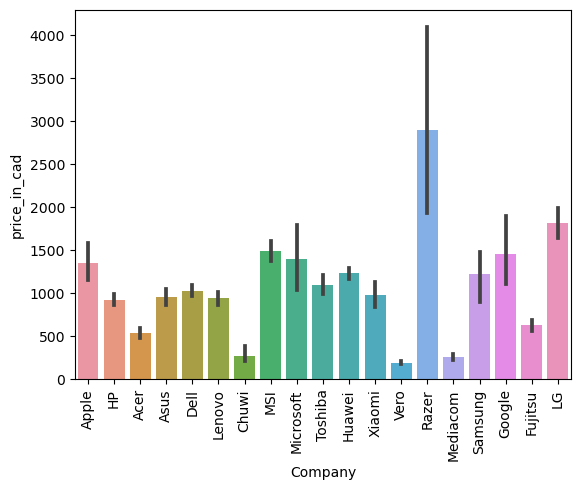

In [17]:
sns.barplot(x=df['Company'],y=df['price_in_cad'])
plt.xticks(rotation=90)
plt.show()

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724


<AxesSubplot:>

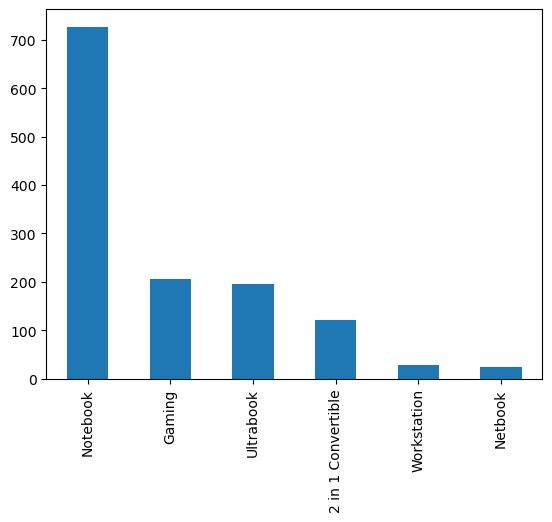

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

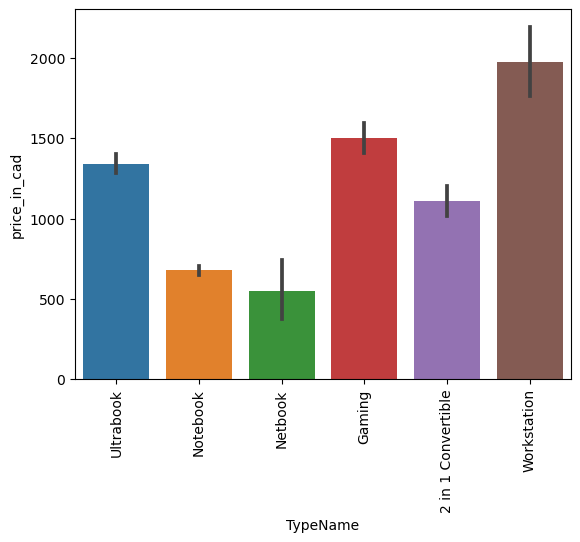

In [20]:
sns.barplot(x=df['TypeName'],y=df['price_in_cad'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Count'>

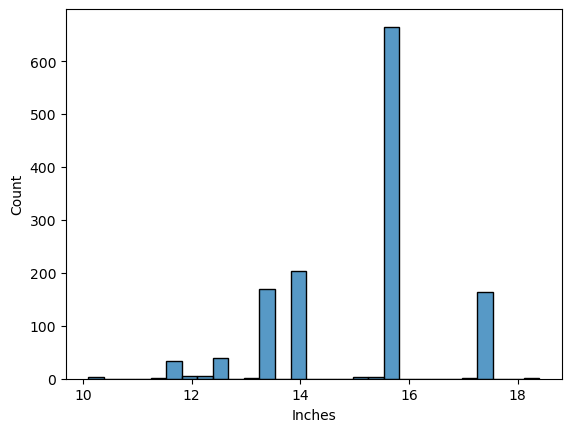

In [21]:
sns.histplot(df['Inches'])

In [22]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<AxesSubplot:>

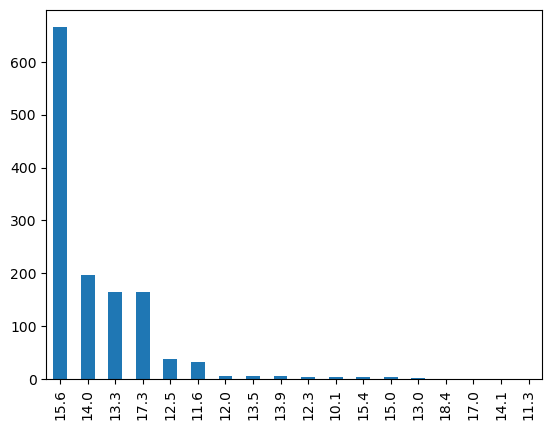

In [23]:
df['Inches'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Inches', ylabel='price_in_cad'>

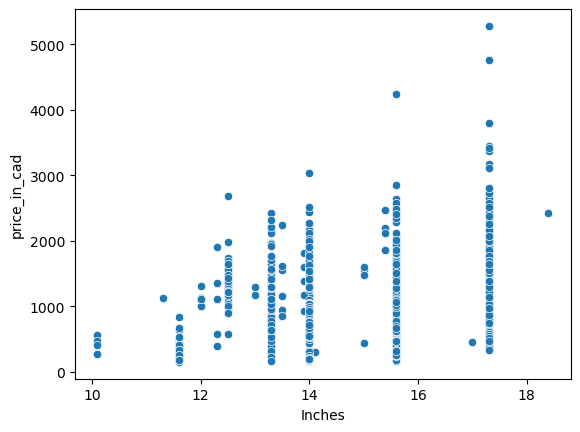

In [24]:
sns.scatterplot(x=df['Inches'],y=df['price_in_cad'])

In [25]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

In [27]:
df.tail(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,778.006206
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,475.968446
1295,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,697.514151
1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,180.871298
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,623.374227
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,319.337364


In [28]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0


In [29]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,644.732618,0
971,Dell,Ultrabook,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,1698.788234,1
180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,907.818142,0
1228,Lenovo,Gaming,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,890.509884,1
82,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.63,744.255102,0
506,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.00,1059.265402,0
1152,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.32,518.382333,0
1254,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,384.234678,0
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,431.841042,0
311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21,2162.666862,1


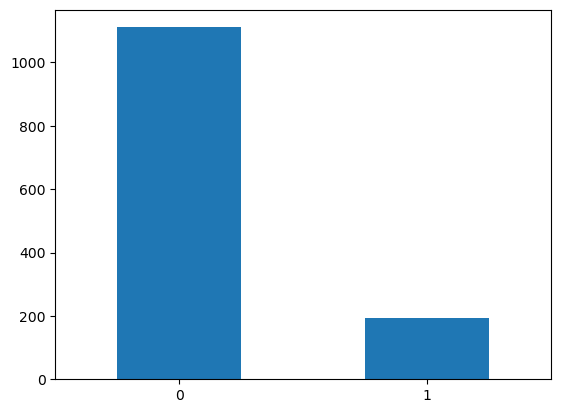

In [30]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Touchscreen', ylabel='price_in_cad'>

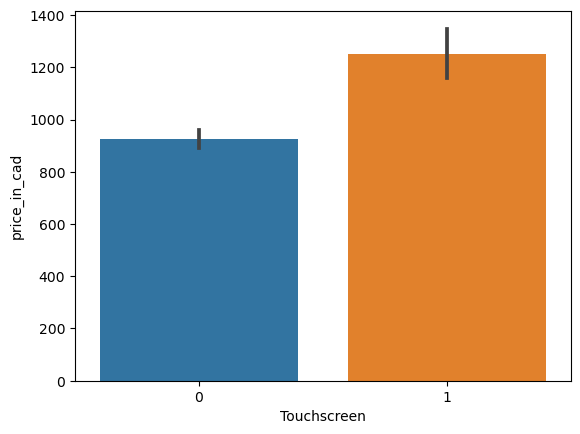

In [31]:
sns.barplot(x=df['Touchscreen'],y=df['price_in_cad'])

In [32]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1


<AxesSubplot:xlabel='IPS', ylabel='price_in_cad'>

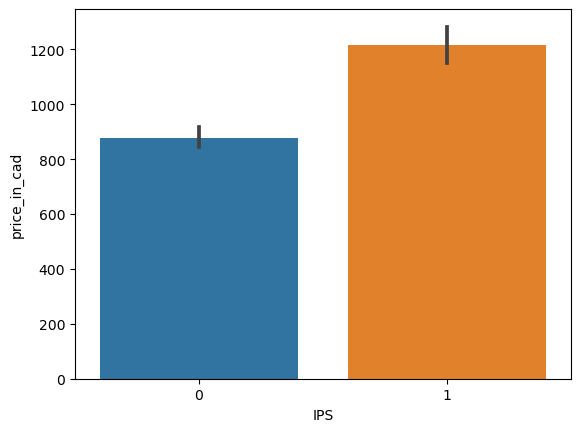

In [33]:
sns.barplot(x=df['IPS'],y=df['price_in_cad'])

In [34]:
df1=df['ScreenResolution'].str.split('x',n=1,expand=True)
df1

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
df['X_res']=df1[0]
df['Y_res']=df1[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,1366,768


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  price_in_cad      1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [38]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  price_in_cad      1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [40]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,1366,768


In [41]:
df['PPI']=(((df['X_res']**2)+(df['Y_res']**2)**0.5)/df['Inches'])
df['PPI']

0       492872.180451
1       155977.443609
2       236376.923077
3       538714.285714
4       492872.180451
            ...      
1298    263391.428571
1299    770060.150376
1300    133337.428571
1301    119661.794872
1302    119661.794872
Name: PPI, Length: 1303, dtype: float64

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,2560,1600,492872.180451
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,1440,900,155977.443609
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,1920,1080,236376.923077
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,2880,1800,538714.285714
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,2560,1600,492872.180451


In [43]:
correlation=df.corr()
correlation

,Inches,Ram,Weight,price_in_cad,Touchscreen,IPS,X_res,Y_res,PPI
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.225935
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.343067
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.167769
price_in_cad,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.480376
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.410482
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.253618
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.967735
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.964119
PPI,-0.225935,0.343067,-0.167769,0.480376,0.410482,0.253618,0.967735,0.964119,1.000000


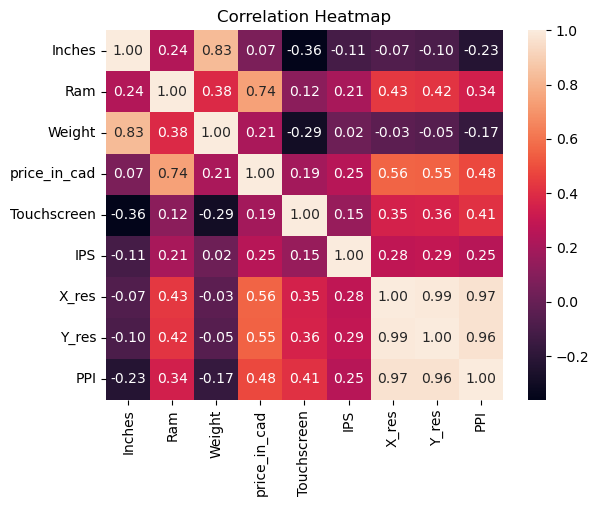

In [44]:
sns.heatmap(correlation,annot=True,fmt=".2f")
plt.title('Correlation Heatmap during Feature Engineering')
plt.show()

In [45]:
df.corr()['price_in_cad']

Inches          0.068197
Ram             0.743007
Weight          0.210370
price_in_cad    1.000000
Touchscreen     0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
PPI             0.480376
Name: price_in_cad, dtype: float64

In [46]:
df=df.drop(columns=['ScreenResolution','X_res','Y_res'])

In [47]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872


In [48]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [49]:
df['Cpu_name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5


In [50]:
def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core i7":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"  
        else:
            return "AMD Processor"

In [51]:
df["Cpu_brand"]=df['Cpu_name'].apply(fetch_processor)
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_name,Cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872,Intel Core i7,Intel Core i7


<AxesSubplot:>

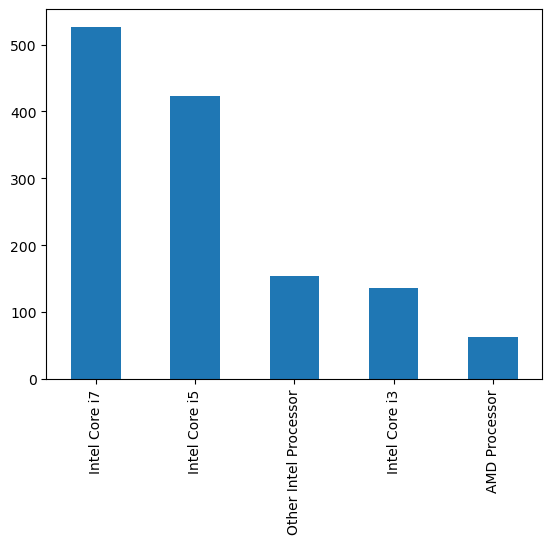

In [52]:
df['Cpu_brand'].value_counts().plot(kind='bar')

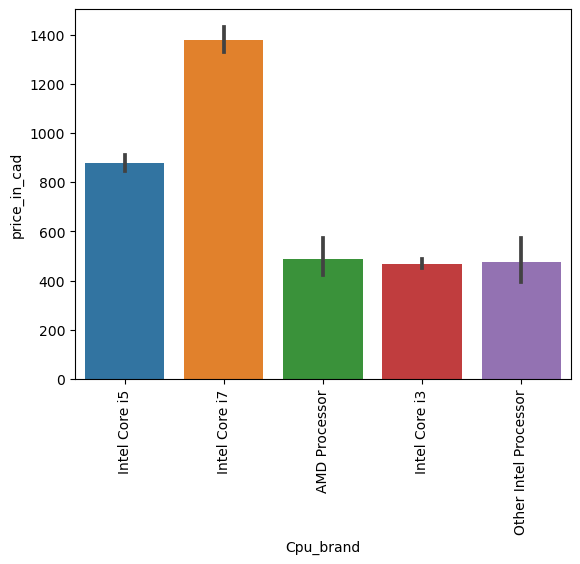

In [53]:
sns.barplot(x=df['Cpu_brand'],y=df['price_in_cad'])
plt.xticks(rotation=90)
plt.show()

In [54]:
df.drop(columns=['Cpu','Cpu_name'],inplace=True)

In [55]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571,Other Intel Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872,Intel Core i7


<AxesSubplot:>

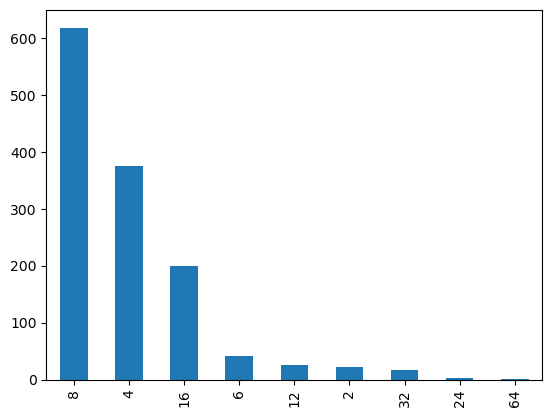

In [56]:
df['Ram'].value_counts().plot(kind='bar')

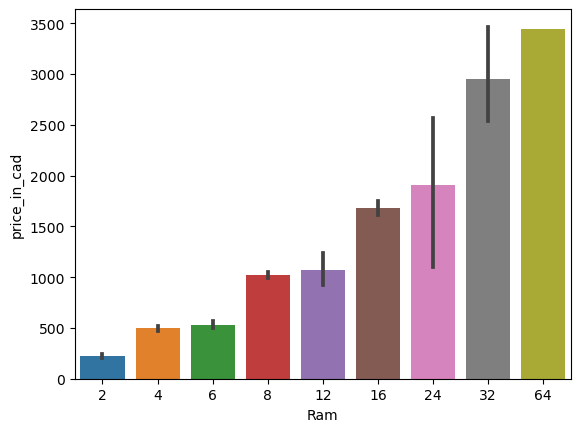

In [57]:
sns.barplot(x=df['Ram'],y=df['price_in_cad'])
plt.xticks(rotation=0)
plt.show()

In [58]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [59]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split("+",n=1,expand=True)

df['first']=new[0]
df['first']=df['first'].str.strip()

df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)


df['first']=df['first'].str.replace(r'\D','')


df['second'].fillna("0",inplace=True)


df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)


df['second']=df['second'].str.replace(r'\D','')


df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])

C:\Users\msura\AppData\Local\Temp\ipykernel_37072\2682182379.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')
C:\Users\msura\AppData\Local\Temp\ipykernel_37072\2682182379.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second']=df['second'].str.replace(r'\D','')


In [60]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,...,0,1,0,0,0,0,0,0,0,64
1301,HP,Notebook,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,...,0,0,0,0,0,0,1000,0,0,0


In [61]:
df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [62]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571,Other Intel Processor,0,0,0,64
1301,HP,Notebook,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872,Intel Core i7,1000,0,0,0


In [63]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1230,Lenovo,Netbook,12.5,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1427.931301,1,1,294998.400000,Intel Core i7,0,512,0,0
1034,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 520,Windows 10,1.84,1063.583812,0,0,236376.923077,Intel Core i7,0,256,0,0
136,Lenovo,Notebook,15.6,4,1000 HDD,Intel HD Graphics 500,No OS,1.90,218.395602,0,0,119661.794872,Other Intel Processor,1000,0,0,0
367,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,No OS,2.40,700.119044,0,1,236376.923077,Intel Core i5,1000,128,0,0
781,Asus,Gaming,17.3,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.30,2033.720338,0,1,213149.132948,Intel Core i7,1000,256,0,0
1140,Lenovo,2 in 1 Convertible,14.0,16,512 SSD,Intel HD Graphics 520,Windows 10,2.80,2111.607500,1,1,468217.142857,Intel Core i7,0,512,0,0
352,MSI,Gaming,17.3,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,1219.366790,0,0,213149.132948,Intel Core i7,1000,128,0,0
453,Lenovo,Notebook,14.0,8,256 SSD,Intel HD Graphics 620,Windows 10,1.65,1163.980364,0,0,263391.428571,Intel Core i5,0,256,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,0,0
659,Dell,Gaming,17.3,32,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2723.774630,0,1,852471.676301,Intel Core i7,1000,512,0,0


In [64]:
df.drop(columns=['Memory'],inplace=True)

In [65]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,0,0


In [66]:
df.corr()['price_in_cad']

Inches           0.068197
Ram              0.743007
Weight           0.210370
price_in_cad     1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.480376
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price_in_cad, dtype: float64

In [67]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376,Intel Core i7,0,512
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571,Other Intel Processor,0,0
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872,Intel Core i7,1000,0


In [68]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [69]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [70]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,Intel


In [71]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

<AxesSubplot:>

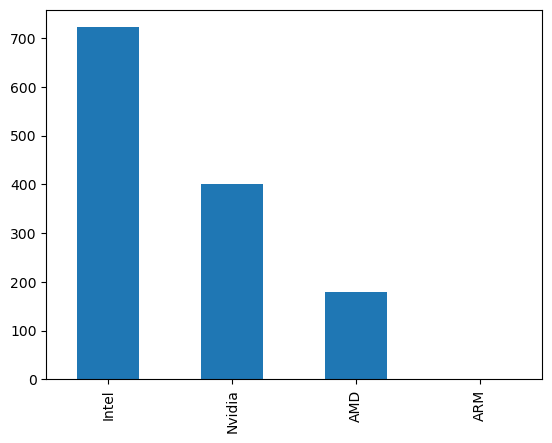

In [72]:
df['Gpu_brand'].value_counts().plot(kind='bar')

In [73]:
df=df[df['Gpu_brand']!= 'ARM']

In [74]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,552.133436,1,1,263391.428571,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1297.253952,1,1,770060.150376,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,198.179556,0,0,133337.428571,Other Intel Processor,0,0,Intel
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,661.175463,0,0,119661.794872,Intel Core i7,1000,0,AMD


In [75]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

<AxesSubplot:>

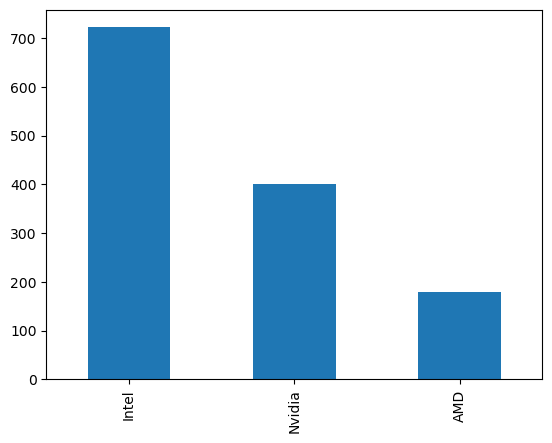

In [76]:
df['Gpu_brand'].value_counts().plot(kind='bar')

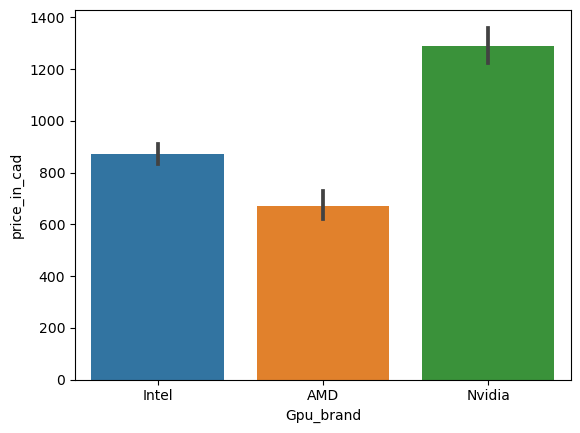

In [77]:
sns.barplot(x=df['Gpu_brand'], y=df['price_in_cad'])
plt.show()

In [78]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\msura\AppData\Local\Temp\ipykernel_37072\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [79]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,Intel


In [80]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

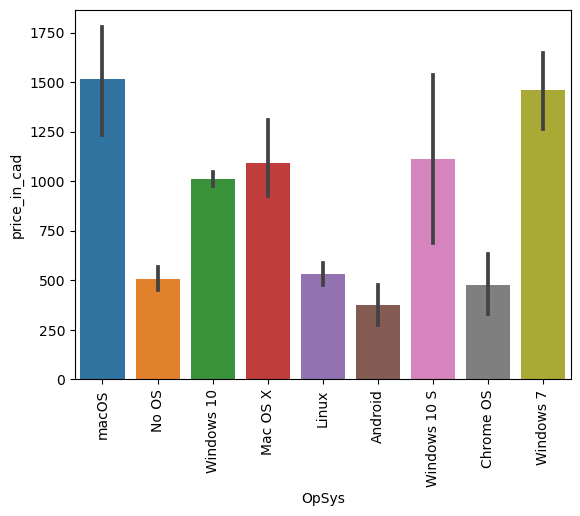

In [81]:
sns.barplot(x=df['OpSys'],y=df['price_in_cad'])
plt.xticks(rotation=90)
plt.show

In [82]:
def cat_os(inp):
    if inp=='Windows 10' or inp =='Windows 7' or inp =='Windows 10 S':
        return 'Windows'
    elif inp== 'macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [83]:
df['OS']=df['OpSys'].apply(cat_os)

C:\Users\msura\AppData\Local\Temp\ipykernel_37072\1995948337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df['OpSys'].apply(cat_os)


In [84]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,13.3,8,macOS,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac


In [85]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\msura\AppData\Local\Temp\ipykernel_37072\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [86]:
df.head()

,Company,TypeName,Inches,Ram,Weight,price_in_cad,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,13.3,8,1.37,1159.385021,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,777.954281,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,497.612423,0,0,236376.923077,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2195.941988,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1560.858724,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac


<function matplotlib.pyplot.show(close=None, block=None)>

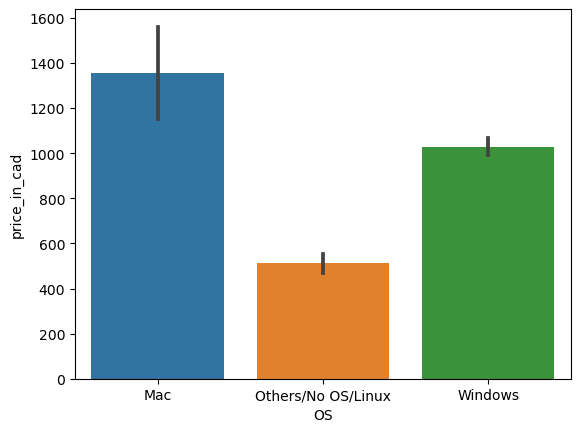

In [87]:
sns.barplot(x=df['OS'],y=df['price_in_cad'])
plt.xticks(rotation=0)
plt.show

C:\Users\msura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

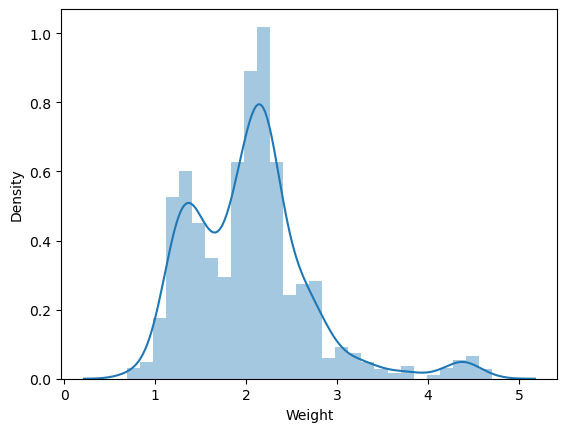

In [88]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='price_in_cad'>

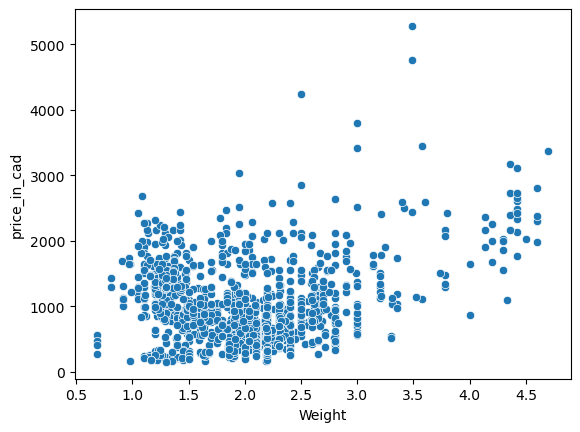

In [89]:
sns.scatterplot(x=df['Weight'],y=df['price_in_cad'])

In [90]:
df.corr()['price_in_cad']

Inches          0.067329
Ram             0.742905
Weight          0.209867
price_in_cad    1.000000
Touchscreen     0.192917
IPS             0.253320
PPI             0.481351
HDD            -0.096891
SSD             0.670660
Name: price_in_cad, dtype: float64

<AxesSubplot:>

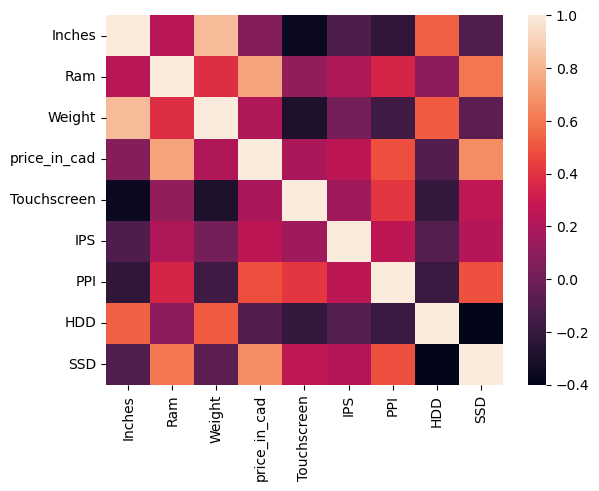

In [91]:
sns.heatmap(df.corr())

In [92]:
df.describe()

,Inches,Ram,Weight,price_in_cad,Touchscreen,IPS,PPI,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1.302000e+03,1302.000000,1302.000000
mean,15.019278,8.385561,2.039416,972.762097,0.146697,0.27957,2.589601e+05,414.101382,183.874040
std,1.424861,5.085166,0.665274,605.061100,0.353940,0.44896,1.723467e+05,515.889348,186.969314
min,10.100000,2.000000,0.690000,150.581846,0.000000,0.00000,1.079031e+05,0.000000,0.000000
25%,14.000000,4.000000,1.500000,518.382333,0.000000,0.00000,1.609245e+05,0.000000,0.000000
50%,15.600000,8.000000,2.040000,846.373826,0.000000,0.00000,2.363769e+05,0.000000,256.000000
75%,15.600000,8.000000,2.300000,1288.110864,0.000000,1.00000,2.633914e+05,1000.000000,256.000000
max,18.400000,64.000000,4.700000,5278.153337,1.000000,1.00000,1.179821e+06,2000.000000,1024.000000


C:\Users\msura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_in_cad', ylabel='Density'>

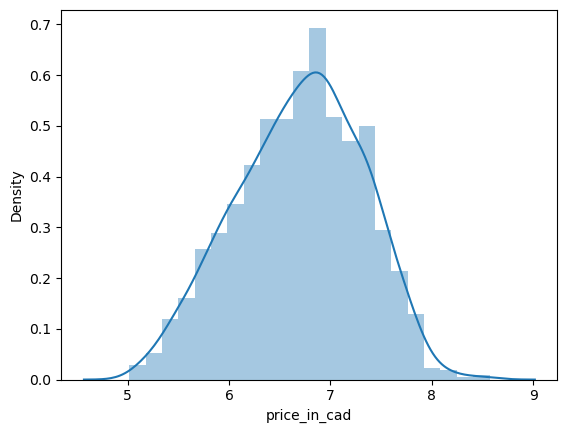

In [93]:
sns.distplot(np.log(df['price_in_cad']))

In [94]:
X=df.drop(columns=['price_in_cad'])
Y=(df['price_in_cad'])

In [95]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,13.3,8,1.37,0,1,492872.180451,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,155977.443609,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,236376.923077,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,0,1,538714.285714,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,492872.180451,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,263391.428571,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,770060.150376,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,133337.428571,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,119661.794872,Intel Core i7,1000,0,AMD,Windows


In [96]:
Y

0       1159.385021
1        777.954281
2        497.612423
3       2195.941988
4       1560.858724
           ...     
1298     552.133436
1299    1297.253952
1300     198.179556
1301     661.175463
1302     319.337364
Name: price_in_cad, Length: 1302, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [98]:
X_train

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
183,Toshiba,Notebook,15.6,8,2.00,0,0,119661.794872,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,15.6,8,2.40,0,0,236376.923077,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,11.6,4,1.20,0,0,160924.482759,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,15.6,4,2.08,1,1,236376.923077,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,15.6,4,2.18,0,0,236376.923077,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,2.20,0,0,119661.794872,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,15.6,16,1.63,0,0,236376.923077,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,15.6,8,2.20,0,0,119661.794872,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,15.6,8,2.20,0,0,119661.794872,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [99]:
X_test

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
248,HP,Notebook,13.3,4,1.49,0,1,2.772541e+05,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,15.6,4,2.00,0,0,1.196618e+05,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,15.6,4,1.86,0,0,1.196618e+05,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,15.6,4,2.15,0,0,2.363769e+05,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,13.3,4,1.28,1,0,2.772541e+05,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,17.3,8,3.35,0,1,2.131491e+05,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,15.6,4,2.20,0,0,1.196618e+05,AMD Processor,500,0,AMD,Others/No OS/Linux
322,Asus,Notebook,14.0,8,2.00,0,0,2.633914e+05,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,13.3,8,1.11,1,1,2.772541e+05,Intel Core i7,0,256,Intel,Windows


In [100]:
Y_train

183      686.272437
1141     988.993873
1049     249.152377
1020     688.860022
878      789.689280
           ...     
466      405.878655
299     1270.426152
493      501.074075
527      397.224526
1193    1006.475214
Name: price_in_cad, Length: 1106, dtype: float64

In [101]:
Y_test

248      584.153714
555      193.852492
1251     345.299751
547      400.123659
885     1556.877825
           ...     
1129     977.051175
172      267.412589
322      946.761723
996     1167.442015
470     1729.960407
Name: price_in_cad, Length: 196, dtype: float64

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [103]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 Score 0.7206879591339153
MAE 201.31321845061646


In [104]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=Ridge(alpha=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 Score 0.7414430177246903
MAE 195.52693747698004


In [105]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=Ridge(alpha=.001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 Score 0.7206966853702585
MAE 201.30974353589528


C:\Users\msura\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.15691e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=.5,
                           max_features=.75,
                           max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 Score 0.8230436448362751
MAE 147.73540682326563


## Model Prediction -
So, as we have gone through various models above, the randomforest model's accuracy is 82%.

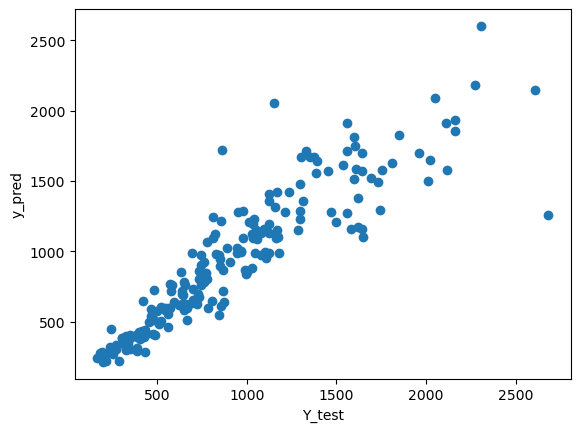

In [108]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.savefig("my_scatter_plot.png")

In [109]:
new_laptop_features = pd.DataFrame({
    'Company': ['Dell'],
    'TypeName': ['Notebook'],
    'Inches': [15.6],
    'Ram': [8],
    'Weight': [2.00],
    'Touchscreen': [0],
    'IPS': [1],
    'PPI': [119661.794872], 
    'Cpu_brand': ['Intel Core i5'], 
    'HDD': [0],
    'SSD': [128],
    'Gpu_brand': ['Intel'],
    'OS': ['Windows'] 
})

In [110]:
new_laptop_features

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Dell,Notebook,15.6,8,2.0,0,1,119661.794872,Intel Core i5,0,128,Intel,Windows


In [111]:
laptop_price_prediction=pipe.predict(new_laptop_features)


In [112]:
print('The NewGen laptop price is:',laptop_price_prediction)

The NewGen laptop price is: [641.89311633]


### Price Prediction for NewGen Laptop
Based on the analysis of the existing laptop dataset for NewGen company, the predicted price for one NewGen laptop is approximately CAD $642. This prediction is derived from a comprehensive analysis of various laptop features and their impact on pricing.
